In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('TimeSeries.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'total_duration', 'count'], dtype='object')

In [4]:
#renaming the columns
df.columns =['date', 'total_duration', 'count']

In [5]:
df.head()

,date,total_duration,count
0,2015-01-01,2559178.0,2578
1,2015-01-02,4789006.0,5108
2,2015-01-03,1225531.0,1703
3,2015-01-04,3044964.0,3658
4,2015-01-05,3434921.0,5222


In [6]:
#converting date column into datetime column
df['date'] =pd.to_datetime(df.date)

In [7]:
#set datetime column as index
df.set_index('date', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2015-01-01 to 2017-12-31
Data columns (total 2 columns):
total_duration    1096 non-null float64
count             1096 non-null int64
dtypes: float64(1), int64(1)
memory usage: 25.7 KB


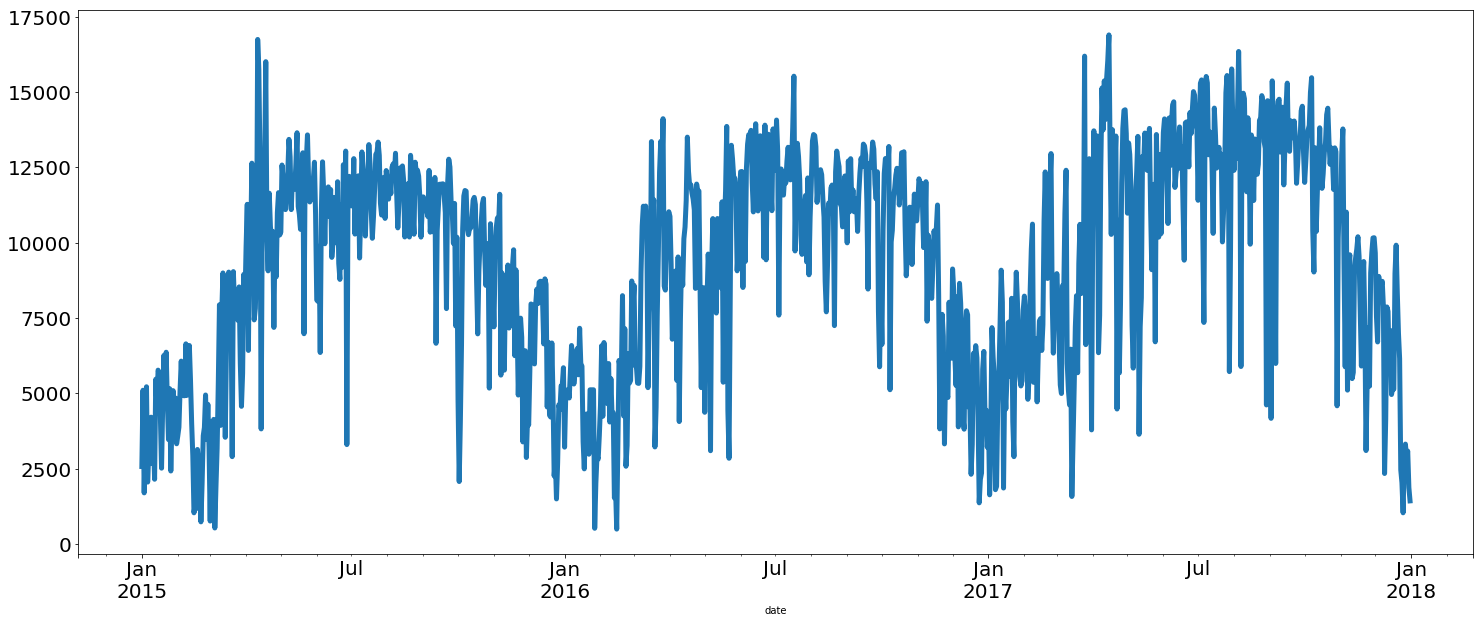

In [8]:
df['count'].plot(figsize= (25,10), linewidth =5, fontsize=20)

### Decomposition plot

<Figure size 432x288 with 0 Axes>

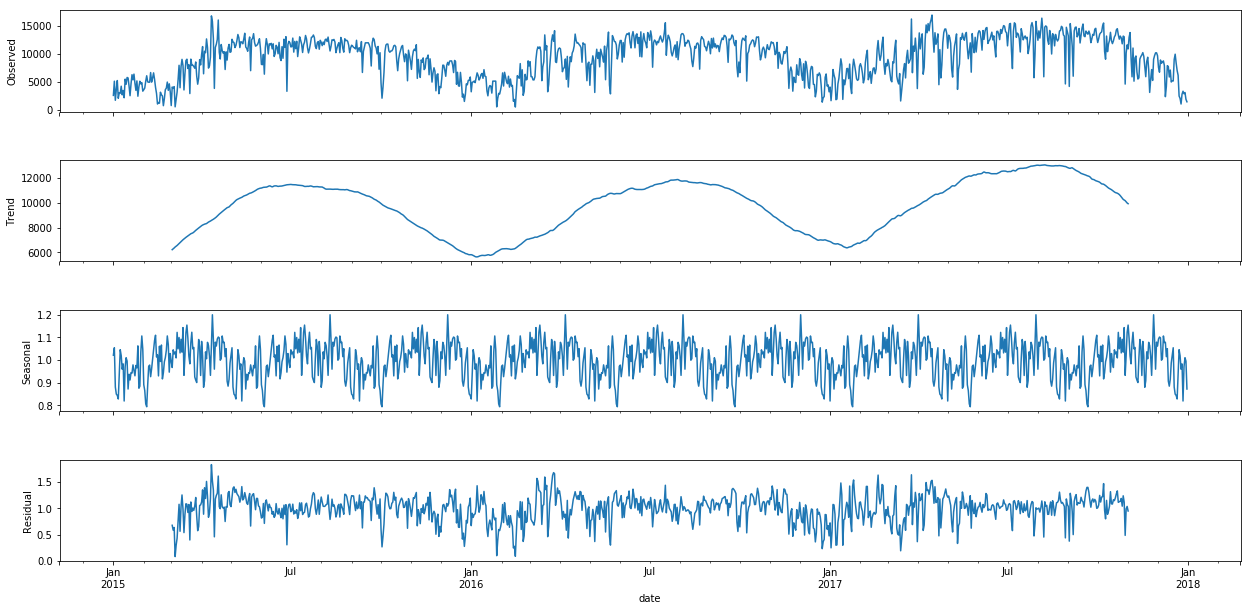

In [9]:
decomposition1 = seasonal_decompose(df['count'],model='multiplicative',freq=120)  
fig = plt.figure()  
fig = decomposition1.plot()  
fig.set_size_inches(20, 10)

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity_graph(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=30, center=False).mean()
    rolstd = timeseries.rolling(window=30, center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in list(dftest[4].items()):
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

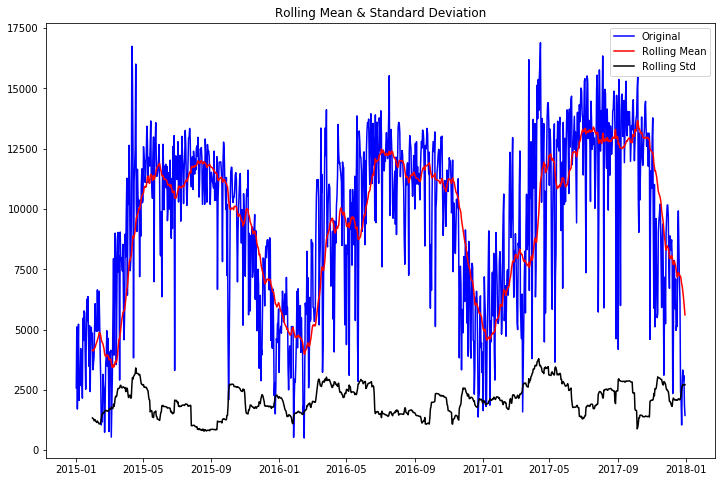

Results of Dickey-Fuller Test:
Test Statistic                   -2.220650
p-value                           0.198836
#Lags Used                       15.000000
Number of Observations Used    1080.000000
Critical Value (1%)              -3.436419
Critical Value (5%)              -2.864220
Critical Value (10%)             -2.568197
dtype: float64


In [12]:
test_stationarity_graph(df['count'])

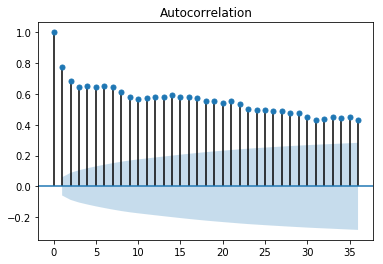

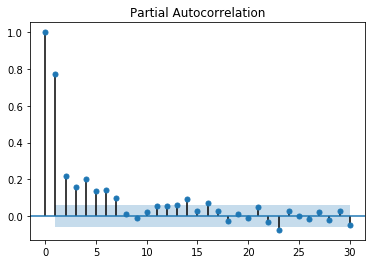

In [28]:
#Autocorrelation plot for number of daily users
plot_acf(df['count'], lags=36);
plot_pacf(df['count'], lags=30);
plt.show()

In [26]:
def test_stationarity(timeseries):
    print('Values for various time series chunk is:')
    
    ## VisualInspection
   
    for i in np.array_split(timeseries, 5):
        print(i.shape)
        print(round(i.mean()))
        print(round(i.var()))
        print('____'*25 )
   
    ## Perform Dickey-Fuller test
    
    print('Values of the Dickey-Fuller test:')
    adf, p_value = adfuller(timeseries)[0:2]
    print(adf, p_value)

In [27]:
test_stationarity(df['count'].values)

Values for various time series chunk is:
(220,)
8568.0
14336271.0
____________________________________________________________________________________________________
(219,)
7779.0
9723483.0
____________________________________________________________________________________________________
(219,)
10941.0
5455693.0
____________________________________________________________________________________________________
(219,)
8451.0
11670949.0
____________________________________________________________________________________________________
(219,)
11245.0
12368116.0
____________________________________________________________________________________________________
Values of the Dickey-Fuller test:
-2.2206502973157085 0.19883613598660482


### Difference

In [42]:
df['diff1'] = df['count'].diff(1)

In [29]:
test_stationarity(df['diff1'].dropna().values)

Values for various time series chunk is:
(219,)
47.0
5032629.0
____________________________________________________________________________________________________
(219,)
-24.0
3416132.0
____________________________________________________________________________________________________
(219,)
24.0
5547175.0
____________________________________________________________________________________________________
(219,)
3.0
7139228.0
____________________________________________________________________________________________________
(219,)
-55.0
7239716.0
____________________________________________________________________________________________________
Values of the Dickey-Fuller test:
-13.447154443993105 3.7454449841190727e-25


### Log of count

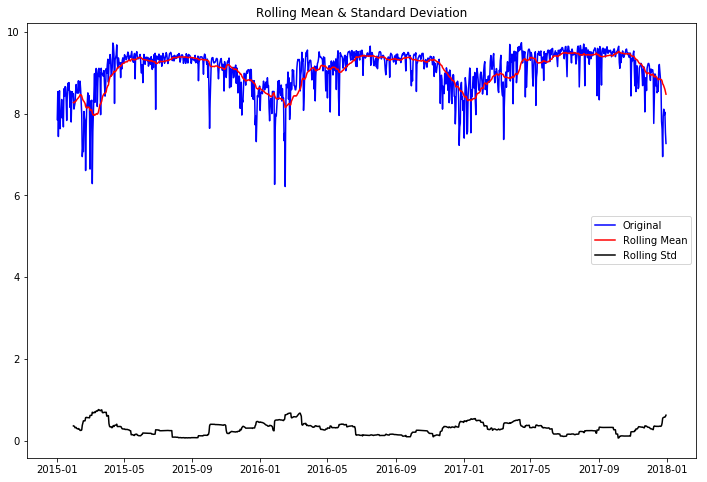

Results of Dickey-Fuller Test:
Test Statistic                   -2.353874
p-value                           0.155181
#Lags Used                       15.000000
Number of Observations Used    1080.000000
Critical Value (1%)              -3.436419
Critical Value (5%)              -2.864220
Critical Value (10%)             -2.568197
dtype: float64


In [37]:
test_stationarity_graph(np.log(df['count']))

<Figure size 432x288 with 0 Axes>

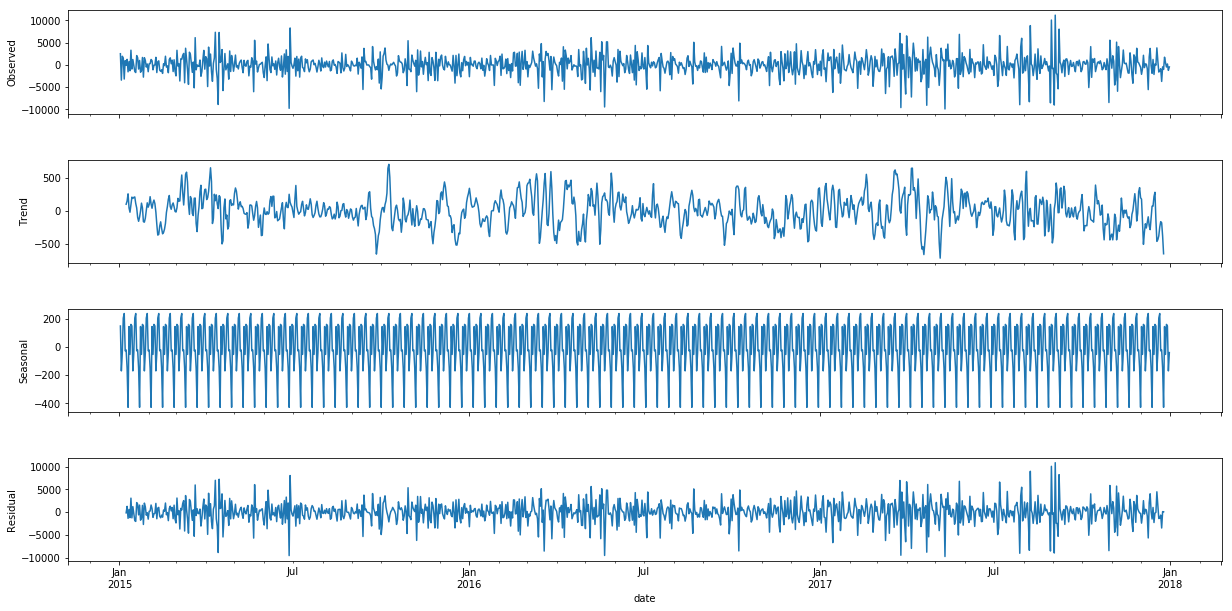

In [126]:
decomposition1 = seasonal_decompose(df['diff1'].dropna(), freq=12)  
fig = plt.figure()  
fig = decomposition1.plot()  
fig.set_size_inches(20, 10)

<Figure size 432x288 with 0 Axes>

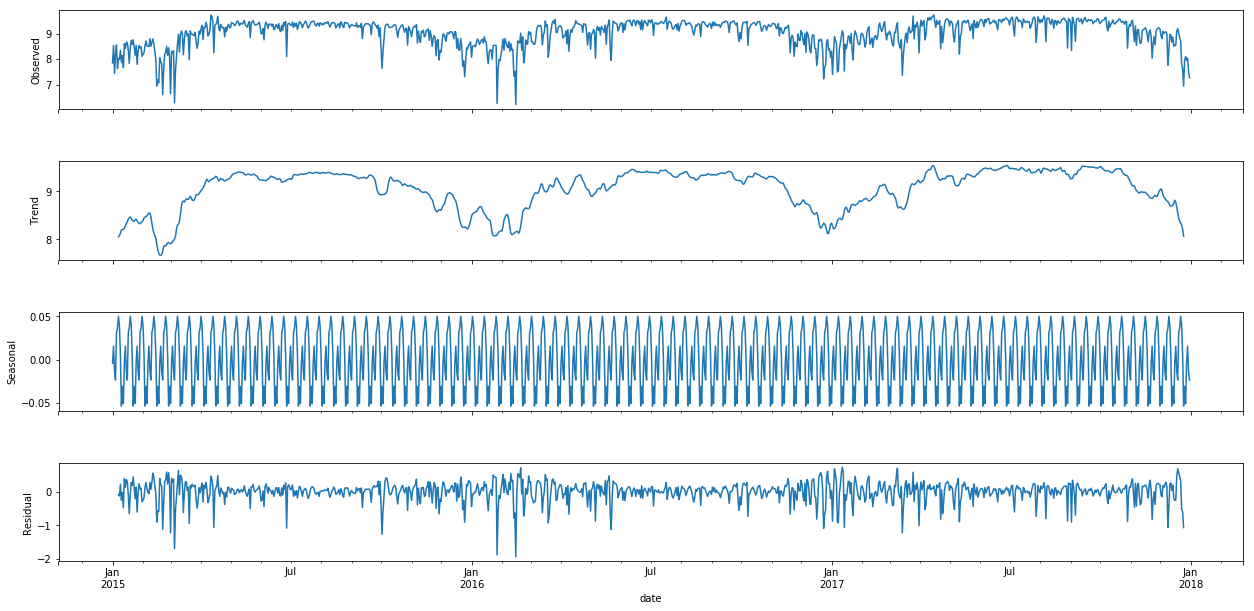

In [36]:
decomposition1 = seasonal_decompose(np.log(df['count']).dropna(), freq=12)  
fig = plt.figure()  
fig = decomposition1.plot()  
fig.set_size_inches(20, 10)

------------
decomposition graph: 2
------------
decomposition graph: 3
------------
decomposition graph: 4
------------
decomposition graph: 5


<Figure size 432x288 with 0 Axes>

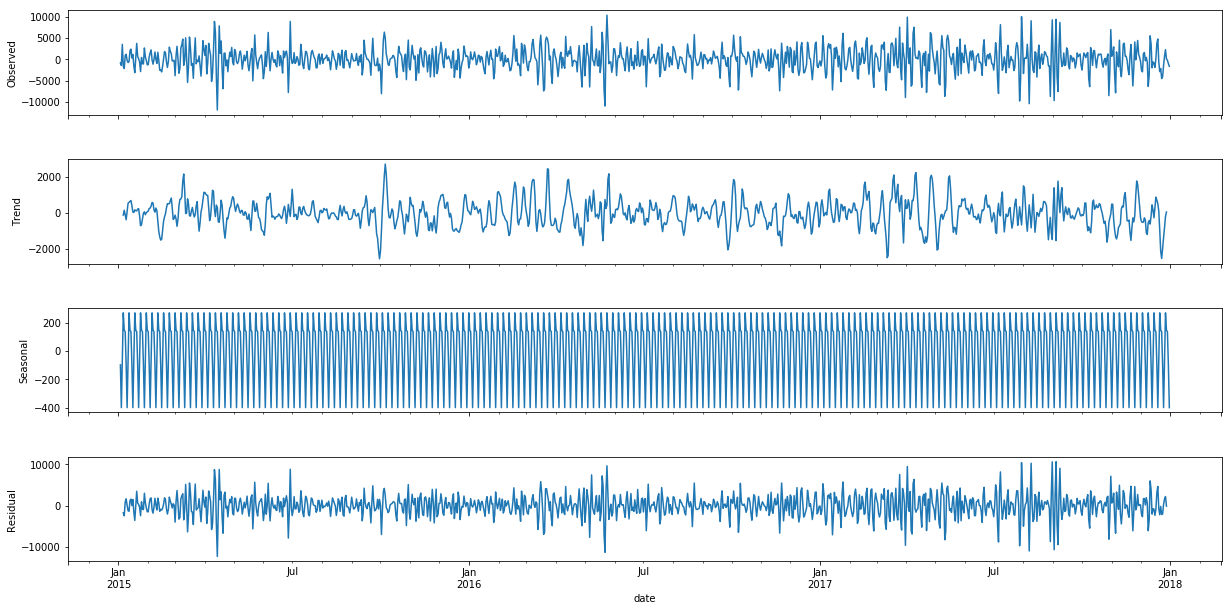

<Figure size 432x288 with 0 Axes>

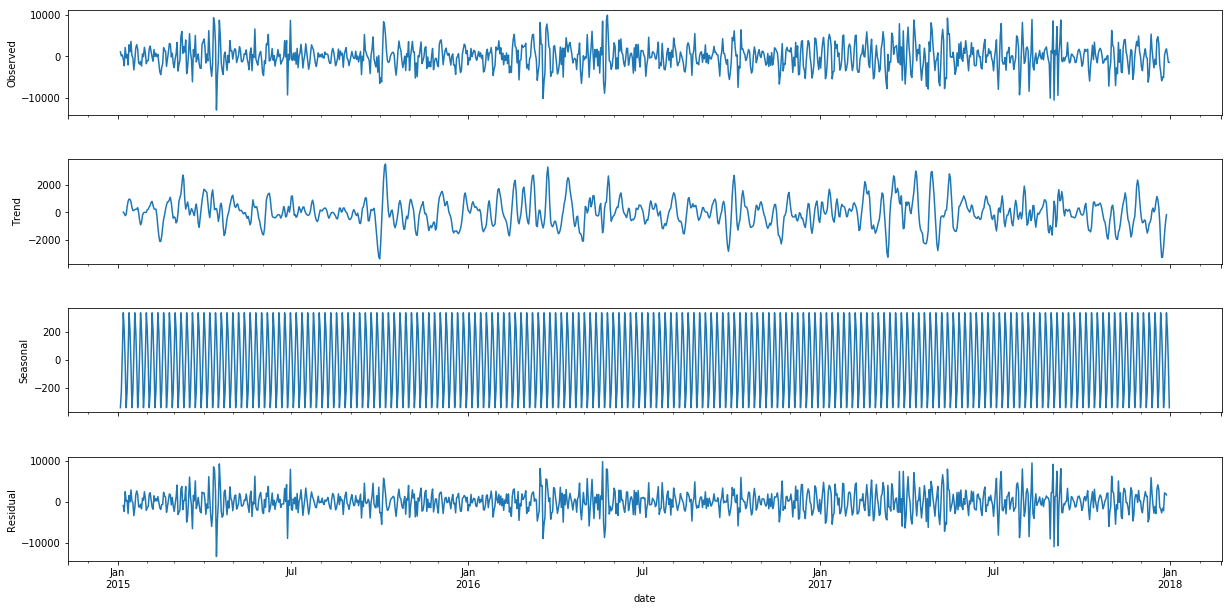

<Figure size 432x288 with 0 Axes>

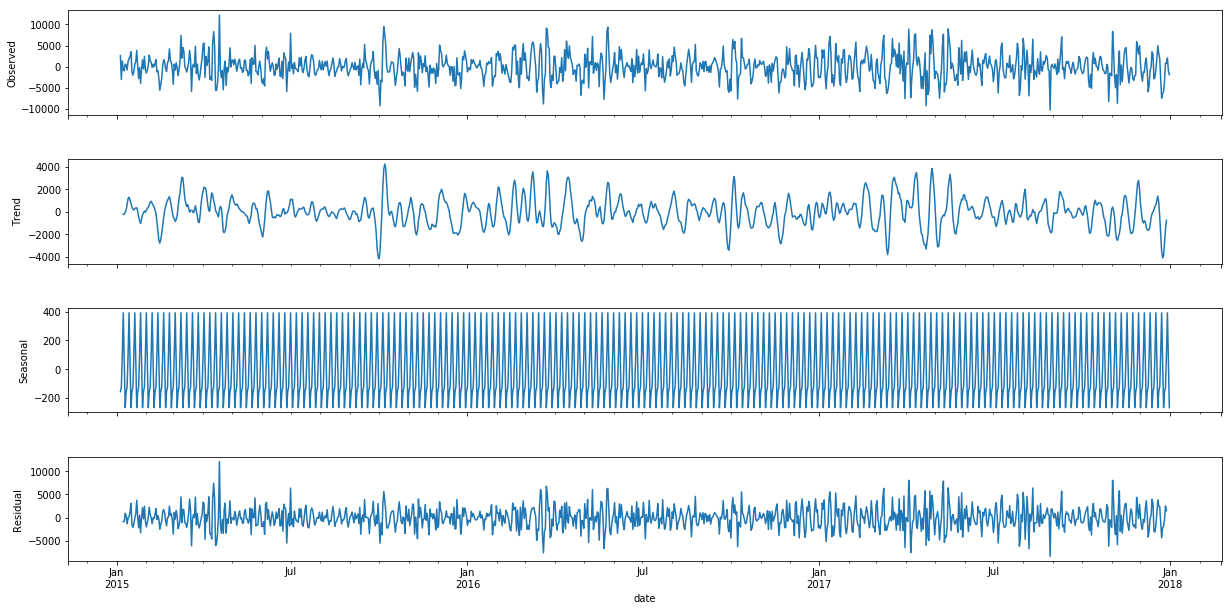

<Figure size 432x288 with 0 Axes>

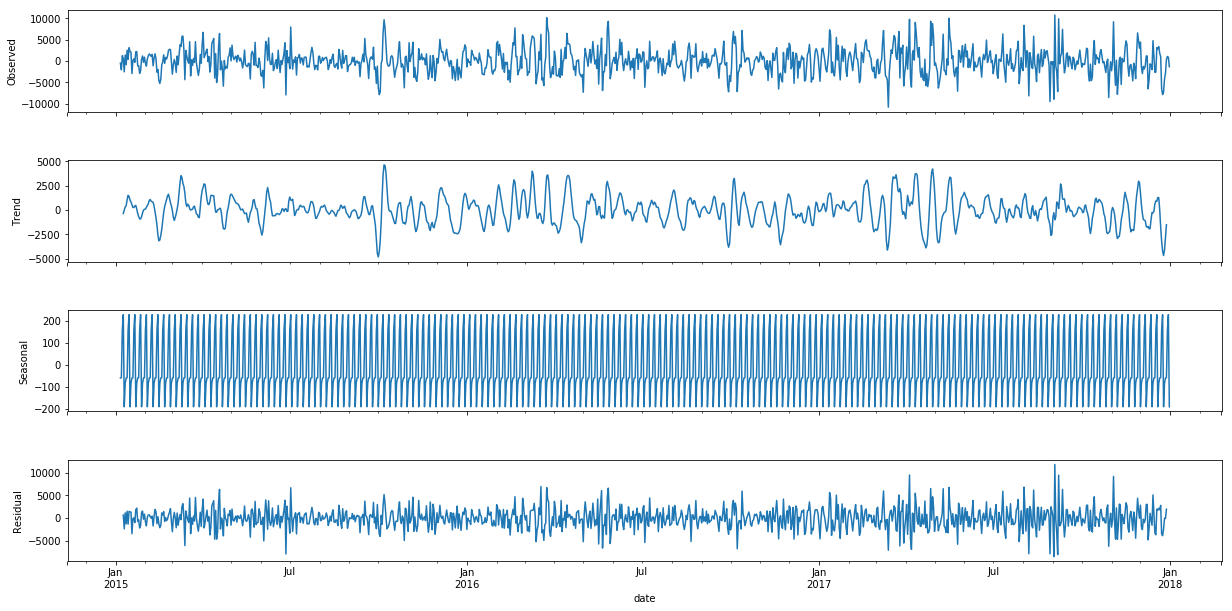

In [23]:
for i in range(2,6):
    df['diff'+str(i)] = df['count'].diff(i)
    print('------------')
    print('decomposition graph:', str(i))
    decomposition = seasonal_decompose(df['diff'+str(i)].dropna(), freq=6)
    fig = plt.figure()  
    fig = decomposition.plot()  
    fig.set_size_inches(20, 10)

In [42]:
df

,total_duration,count,diff1,diff2,diff6,diff3,diff4,diff5
date,,,,,,,,
2015-01-01,2559178.0,2578,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,4789006.0,5108,2530.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,1225531.0,1703,-3405.0,-875.0,NaN,NaN,NaN,NaN
2015-01-04,3044964.0,3658,1955.0,-1450.0,NaN,1080.0,NaN,NaN
2015-01-05,3434921.0,5222,1564.0,3519.0,NaN,114.0,2644.0,NaN
2015-01-06,1349871.0,2060,-3162.0,-1598.0,NaN,357.0,-3048.0,-518.0
2015-01-07,1962348.0,3035,975.0,-2187.0,457.0,-623.0,1332.0,-2073.0
2015-01-08,1835641.0,2952,-83.0,892.0,-2156.0,-2270.0,-706.0,1249.0
2015-01-09,2784986.0,4214,1262.0,1179.0,2511.0,2154.0,-1008.0,556.0


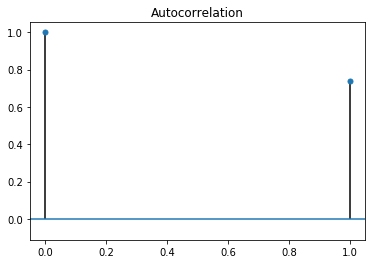

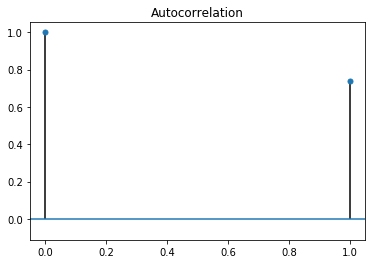

In [41]:
plot_acf(np.log(df['count']), lags=1)

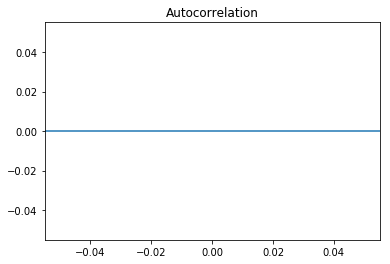

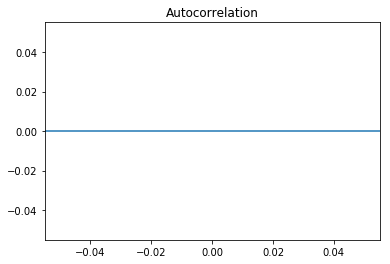

In [40]:
plot_acf(df['diff3'], lags=1)

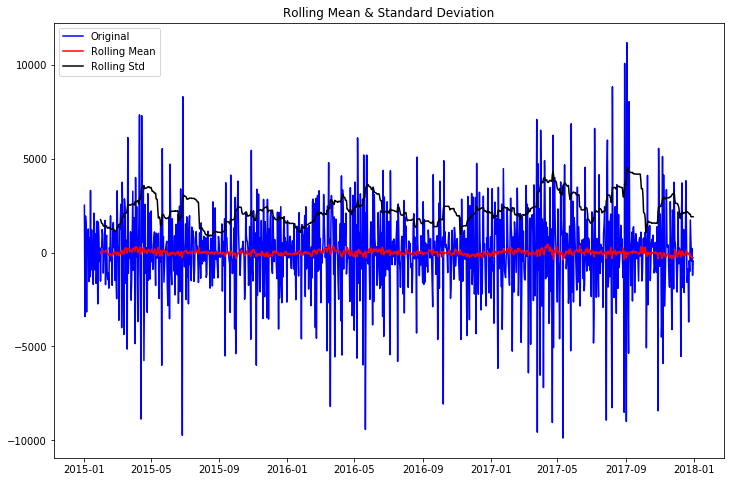

Results of Dickey-Fuller Test:
Test Statistic                -1.344715e+01
p-value                        3.745445e-25
#Lags Used                     1.400000e+01
Number of Observations Used    1.080000e+03
Critical Value (1%)           -3.436419e+00
Critical Value (5%)           -2.864220e+00
Critical Value (10%)          -2.568197e+00
dtype: float64


In [45]:
test_stationarity_graph(df['diff1'].dropna())

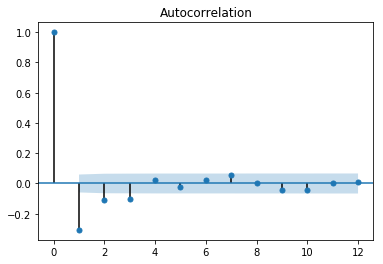

In [49]:
plot_acf(df.diff1.dropna(), lags=12);

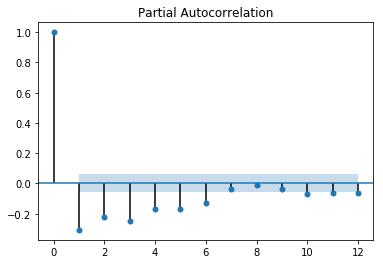

In [127]:
plot_pacf(df.diff1.dropna(), lags=12);

In [56]:
df.diff1.dropna()

date
2015-01-02    2530.0
2015-01-03   -3405.0
2015-01-04    1955.0
2015-01-05    1564.0
2015-01-06   -3162.0
2015-01-07     975.0
2015-01-08     -83.0
2015-01-09    1262.0
2015-01-10   -1541.0
2015-01-11     778.0
2015-01-12   -1296.0
2015-01-13    3318.0
2015-01-14    -918.0
2015-01-15    1219.0
2015-01-16     -91.0
2015-01-17   -1466.0
2015-01-18   -1694.0
2015-01-19    2111.0
2015-01-20    1629.0
2015-01-21    -913.0
2015-01-22    1019.0
2015-01-23   -1636.0
2015-01-24   -1261.0
2015-01-25    1687.0
2015-01-26   -2730.0
2015-01-27    1638.0
2015-01-28    1027.0
2015-01-29    -466.0
2015-01-30     220.0
2015-01-31   -1517.0
               ...  
2017-12-02   -2099.0
2017-12-03    -851.0
2017-12-04    2176.0
2017-12-05    -593.0
2017-12-06     249.0
2017-12-07     180.0
2017-12-08    -840.0
2017-12-09   -5535.0
2017-12-10    1805.0
2017-12-11    3720.0
2017-12-12    -146.0
2017-12-13   -1871.0
2017-12-14    1238.0
2017-12-15   -2127.0
2017-12-16     219.0
2017-12-17     -43.0
2017-12-

In [57]:
df.diff1.shape

TypeError: 'tuple' object is not callable

In [72]:
train = df['count'].head(822)
test = df['count'].tail(274)
test.shape

(274,)

In [85]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
predictions=[]

In [67]:
model = ARIMA(train, order=(1,1,0))

C:\Users\anita\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\anita\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [76]:
model_fit = model.fit()

In [77]:
print(model_fit.aic)

14896.37917846205


In [110]:
predictions= model_fit.forecast(steps=len(test))
predictions

2017-04-02     9634.881451
2017-04-03     9502.733011
2017-04-04     9069.390636
2017-04-05     8963.080701
2017-04-06     8928.248280
2017-04-07     9139.880788
2017-04-08     9185.195343
2017-04-09     9398.473468
2017-04-10     8992.949389
2017-04-11     9132.958387
2017-04-12     9559.697472
2017-04-13     9545.279697
2017-04-14     9436.218232
2017-04-15     9486.915924
2017-04-16     9127.312295
2017-04-17     9048.874648
2017-04-18     9069.444460
2017-04-19     9219.647720
2017-04-20     9296.924755
2017-04-21     9503.084640
2017-04-22     9115.786826
2017-04-23     9238.696682
2017-04-24     9619.663613
2017-04-25     9648.305554
2017-04-26     9535.448465
2017-04-27     9584.943538
2017-04-28     9224.854879
2017-04-29     9146.233889
2017-04-30     9166.439138
2017-05-01     9317.046661
                  ...     
2017-12-02    10917.547138
2017-12-03    11068.152019
2017-12-04    11145.220094
2017-12-05    11351.426518
2017-12-06    10964.009545
2017-12-07    11087.031191
2

In [111]:
mean_squared_error(test,predictions)

NameError: name 'mean_squared_error' is not defined

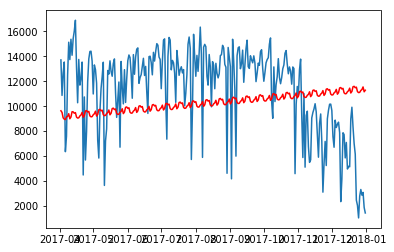

In [112]:
plt.plot(test)
plt.plot(predictions,color='red')

In [82]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [84]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue 

(0, 0, 0) 15693.190186706248
(0, 0, 1) 15281.425853680876
(0, 0, 2) 15090.258848476658
(0, 0, 3) 15028.48934114192
(0, 0, 4) 14993.678487882516
(0, 1, 0) 14979.872517713162
(0, 1, 1) 14815.693870268313
(0, 1, 2) 14768.186496161125
(0, 1, 3) 14755.250139213897
(0, 2, 0) 15750.336172609057
(0, 2, 1) 14971.32557165005
(1, 0, 0) 14908.444881499086
(1, 0, 1) 14825.50244242322
(1, 0, 2) 14785.1264418911
(1, 0, 3) 14773.188008142122
(1, 0, 4) 14774.565554451812
(1, 1, 0) 14896.37917846205
(1, 1, 1) 14758.550669790939
(1, 1, 2) 14760.548590305449
(1, 1, 3) 14756.960584051094
(1, 1, 4) 14756.452376405454
(1, 2, 0) 15395.864989065924
(2, 0, 0) 14864.83156053223
(2, 0, 1) 14776.604193736184
(2, 0, 2) 14778.465527608192
(2, 0, 3) 14774.838893333424
(2, 0, 4) 14774.415980296848
(2, 1, 0) 14872.15505481686
(2, 1, 1) 14760.547456683753
(2, 1, 2) 14761.735614905456
(2, 1, 3) 14757.77928151181
(2, 1, 4) 14758.396831909891
(2, 2, 0) 15281.300401441185
(3, 0, 0) 14854.505617772193
(3, 0, 1) 14778.4693420

In [128]:
# define model configuration
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))
#pdq
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 3)

In [129]:
model = SARIMAX(train,trend='ct', order=my_order, seasonal_order=my_seasonal_order)

In [130]:
model_fit = model.fit()

In [131]:
yhat = model_fit.forecast(steps=len(test))

In [132]:
model_fit.aic

15031.695394953753

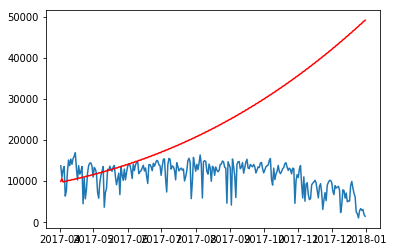

In [133]:
plt.plot(test)
plt.plot(yhat,color='red')

In [134]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [137]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train,order=param,
                        seasonal_order=param_seasonal,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:17351.79486142714
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:16655.860632912983
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:15257.842640477256
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:14859.856342991496
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:15263.45353750001
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:15090.700468552775
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:14896.480252328896
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:14857.251586279115
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:16802.49124209227
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:15849.926920839003
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:15080.811744479408
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:14669.62299957938
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:15093.196304454908
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:14859.854450709274
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:14718.874114116978
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:14670.097203856303
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:14959.338259098997
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:14744.873230007

In [141]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train,order=param,
                        seasonal_order=param_seasonal,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{}12 - BIC:{}'.format(param, param_seasonal, results.bic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - BIC:17356.505384536595
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - BIC:16665.2522307471
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - BIC:15262.538439394315
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - BIC:14869.218052349077
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - BIC:15272.847605995343
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - BIC:15104.787865303952
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - BIC:14905.844469523796
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - BIC:14871.294150315485
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - BIC:16811.909850772787
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - BIC:15864.010607014567
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - BIC:15090.20086859645
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - BIC:14683.661797136914
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - BIC:15107.287407197908
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - BIC:14878.632698943358
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - BIC:14732.920439909327
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - BIC:14688.81560059968
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - BIC:14964.047563439255
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - B